In [8]:
#Realizamos imports de librerias
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier

### Descarga de los datos

In [9]:
!wget https://raw.githubusercontent.com/andres-calvo/modelos-1/master/train.csv -O train.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Carga y limpieza de datos

In [10]:
train=pd.read_csv('train.csv')
train.drop('policy_id', axis=1, inplace=True)

In [11]:
#Transformamos los datos de las variables categóricas a una representación numérica
for columns in train.columns:
    if dict(train.dtypes)[columns] == 'object':
        label_encoder = preprocessing.LabelEncoder()
        train[columns] = label_encoder.fit_transform(train[columns])


# Determinar cuántos valores nulos quieres en cada columna
num_rows = train.shape[0]
num_nulls = int(0.05 * num_rows)  # 5% de los valores nulos

# Crear una lista aleatoria de índices de filas
null_rows = np.random.choice(num_rows, size=num_nulls, replace=False)
# Columnas donde simularemos los nulos
null_columns=['policy_tenure','area_cluster','age_of_car']
# Asignar valores nulos a las celdas correspondientes
train.loc[null_rows, null_columns] = np.nan

train.head(10)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0.0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11.0,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,15.0,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,16.0,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,17.0,34738,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,0
5,1.018709,0.07,0.519231,18.0,13051,3,4,5,1,4,...,1,1,1,1,1,0,1,1,3,0
6,0.097992,0.16,0.403846,19.0,6112,4,2,6,1,3,...,0,1,1,1,0,0,1,1,5,0
7,0.509085,0.14,0.423077,20.0,8794,1,2,7,2,0,...,1,1,1,1,1,1,1,1,2,0
8,0.282394,0.07,0.298077,19.0,6112,3,4,5,1,4,...,1,1,1,1,1,0,1,1,3,0
9,0.566255,0.04,0.442308,21.0,17804,1,2,8,2,0,...,1,1,1,1,1,1,1,1,0,0


## Grafica de distribución de nulos en el dataset


Text(0, 0.5, 'Columnas')

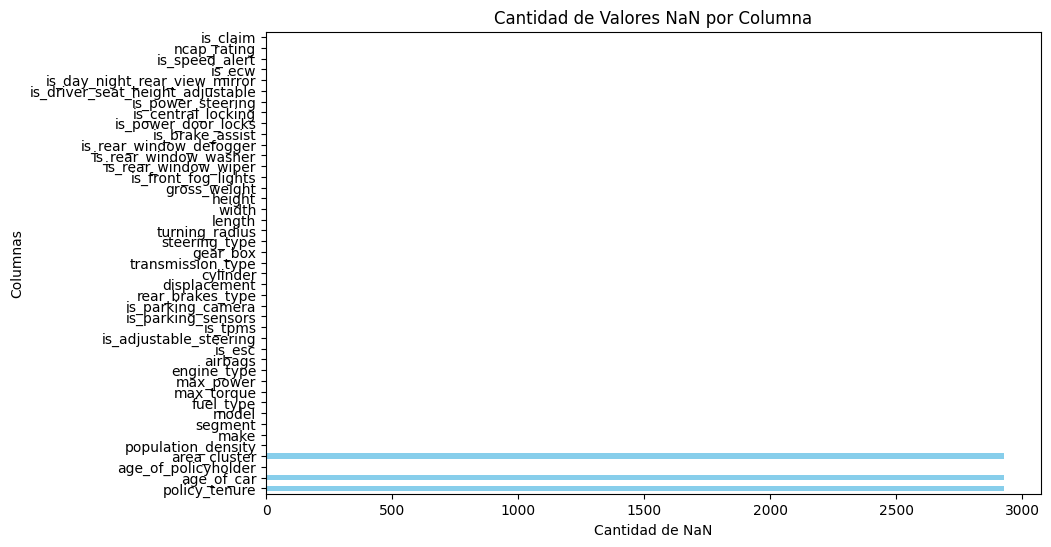

In [12]:
num_nans = train.isna().sum()
plt.figure(figsize=(10, 6))
num_nans.plot(kind='barh', color='skyblue')
# Personalizar el gráfico
plt.title('Cantidad de Valores NaN por Columna')
plt.xlabel('Cantidad de NaN')
plt.ylabel('Columnas')

In [13]:
print(num_nans.sort_values(ascending=False))

policy_tenure                       2929
area_cluster                        2929
age_of_car                          2929
ncap_rating                            0
is_rear_window_washer                  0
turning_radius                         0
length                                 0
width                                  0
height                                 0
gross_weight                           0
is_front_fog_lights                    0
is_rear_window_wiper                   0
is_rear_window_defogger                0
is_speed_alert                         0
steering_type                          0
is_power_door_locks                    0
is_central_locking                     0
is_power_steering                      0
is_driver_seat_height_adjustable       0
is_day_night_rear_view_mirror          0
is_ecw                                 0
is_brake_assist                        0
transmission_type                      0
gear_box                               0
cylinder        

Entendimiento columna objetivo

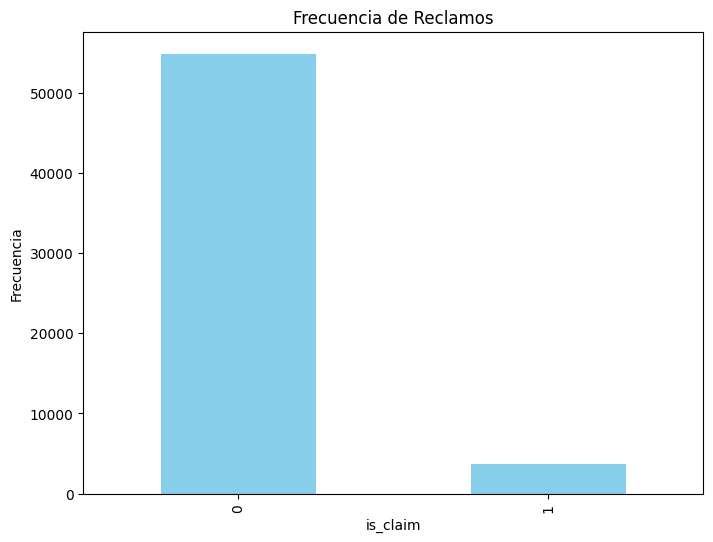

In [14]:
plt.figure(figsize=(8, 6))
train['is_claim'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Frecuencia de Reclamos")
plt.xlabel('is_claim')
plt.ylabel("Frecuencia")
plt.show()

# Modelos supervisados


# Nro 1 , HistGradientBoostingClassifier

In [15]:
#Eliminamos las filas con NaN para poder utilizar un modelo de regresión logística e HistGradientBoostingClassifier
train.dropna(inplace=True)

# Desarrollo  de primer modelo HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTEN

#PREPARACIÓN DE DATOS

# Definir X y y
X = train.drop(["is_claim"], axis=1)  # X: conjunto de características
y = train["is_claim"]  # y: variable objetivo (clase que queremos predecir)

# Estandarizar X
X = StandardScaler().fit_transform(X)  # Estandarizar las características para que tengan media 0 y desviación estándar 1

# Seleccionar mejores características
kbest = SelectKBest(k=20).fit(X, y)  # Seleccionar las 20 mejores características usando SelectKBest
X_selected = kbest.transform(X)  # Aplicar la selección de características a X

# Aplicar sobremuestreo SMOTEN para abordar el desbalance de clases
sm = SMOTEN(sampling_strategy="minority", k_neighbors=20, n_jobs=-1)
X_res, y_res = sm.fit_resample(X_selected, y)

# División de datos en conjunto de evaluación y conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


c:\Python312\Lib\site-packages\imblearn\over_sampling\_smote\base.py:950: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


## Mejores hiperparametros


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier

# Definir los parámetros a ajustar
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Inicializar el modelo HistGradientBoostingClassifier
modelHGBC = HistGradientBoostingClassifier()

# Realizar búsqueda de hiperparámetros
grid_search = GridSearchCV(modelHGBC, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 7}


## Entrenamiento del modelo basado en hiperparametros

In [17]:
modelHGBC = HistGradientBoostingClassifier(learning_rate=0.2, max_depth=7)

modelEntrenadoHGBC = modelHGBC.fit(X_train, y_train)

## Predicciones y métricas

In [18]:
predictions = modelEntrenadoHGBC.predict(X_test)
train_accuracy = accuracy_score(y_test, predictions)

# Imprimir la precisión del modelo en el conjunto de prueba
print('Accuracy:', 100 * train_accuracy)

Accuracy: 92.97092409557624


## Tabla de métricas para el modelo Hist Gradient Boosting

In [19]:

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10421
           1       0.93      0.93      0.93     10421

    accuracy                           0.93     20842
   macro avg       0.93      0.93      0.93     20842
weighted avg       0.93      0.93      0.93     20842



## Plot de gráfica ROC junto a su valor

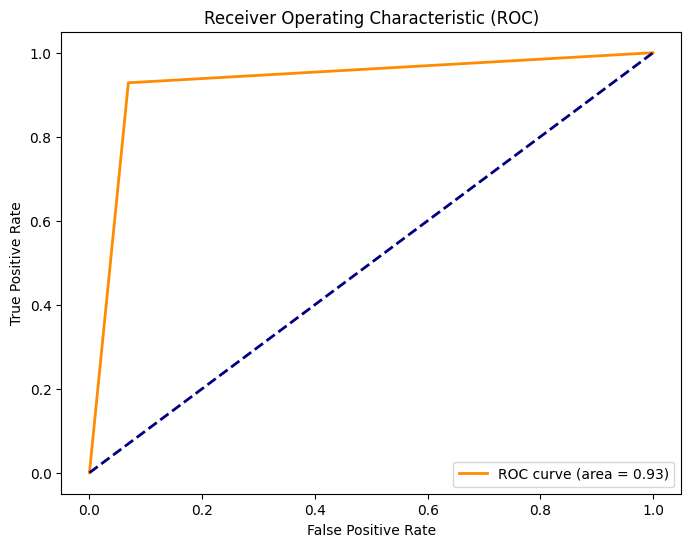

In [20]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Grafica de learning curve

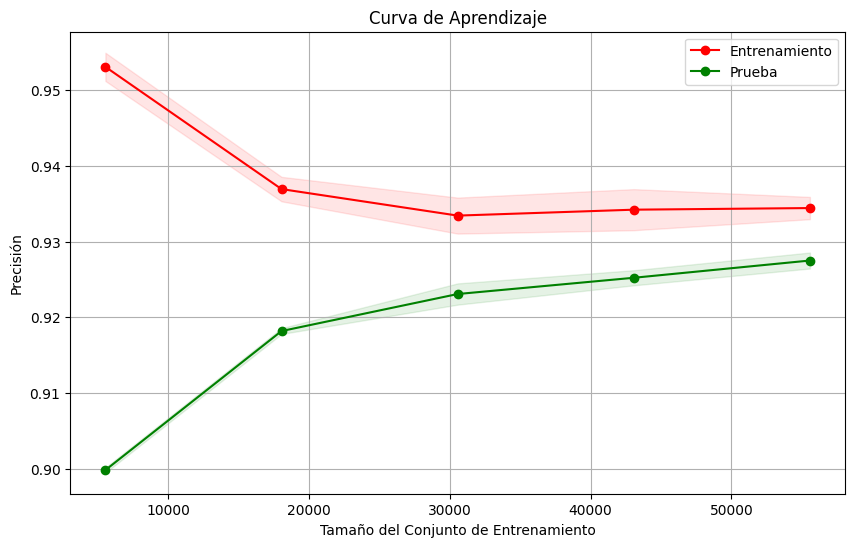

In [21]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Precisión")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Prueba")

    plt.legend(loc="best")
    plt.show()


plot_learning_curve(modelEntrenadoHGBC, X_train, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 5))

## Desarrollo de nuestro segundo modelo, en este caso regresión logística

In [22]:
#Desarrollo modelo regresión logística

# Definir X y y
#X = train.drop(["is_claim"], axis=1)  # X: conjunto de características
#y = train["is_claim"]  # y: variable objetivo (clase que queremos predecir)

# Estandarizar X
#X = StandardScaler().fit_transform(X)  # Estandarizar las características para que tengan media 0 y desviación estándar 1

# Seleccionar mejores características
#kbest = SelectKBest(k=20).fit(X, y)  # Seleccionar las 20 mejores características usando SelectKBest
#X_selected = kbest.transform(X)  # Aplicar la selección de características a X

# Aplicar sobremuestreo SMOTEN para abordar el desbalance de clases
#sm = SMOTEN(sampling_strategy="minority", k_neighbors=20, n_jobs=-1)
#X_res, y_res = sm.fit_resample(X_selected, y)

# División de datos en conjunto de evaluación y conjunto de entrenamiento
#X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


In [23]:

# Definir los parámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Inicializar el modelo HistGradientBoostingClassifier
modelLR = LogisticRegression()

# Realizar búsqueda de hiperparámetros
grid_search = GridSearchCV(modelLR, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [24]:
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'C': 10, 'penalty': 'l2'}


## Entrenamiento del modelo basado en hiperparametros

In [25]:
modelLR = LogisticRegression(C=100, penalty='l2')

modelEntrenadoLR = modelLR.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Predicciones y tabla de métricas de evaluación para el modelo de Regresión Logística

In [26]:
predictions = modelEntrenadoLR.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80     10421
           1       0.77      0.91      0.83     10421

    accuracy                           0.82     20842
   macro avg       0.83      0.82      0.81     20842
weighted avg       0.83      0.82      0.81     20842



In [28]:
train_accuracy= accuracy_score(y_test,predictions)

print('Accuracy')
print( 100*train_accuracy)


Accuracy
81.52768448325497


## Gráfico ROC para modelo de regresión logística




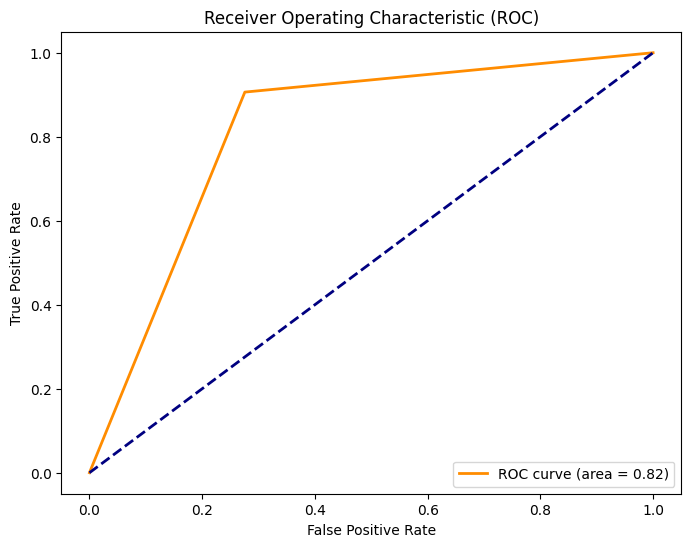

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Grafica de learning curve

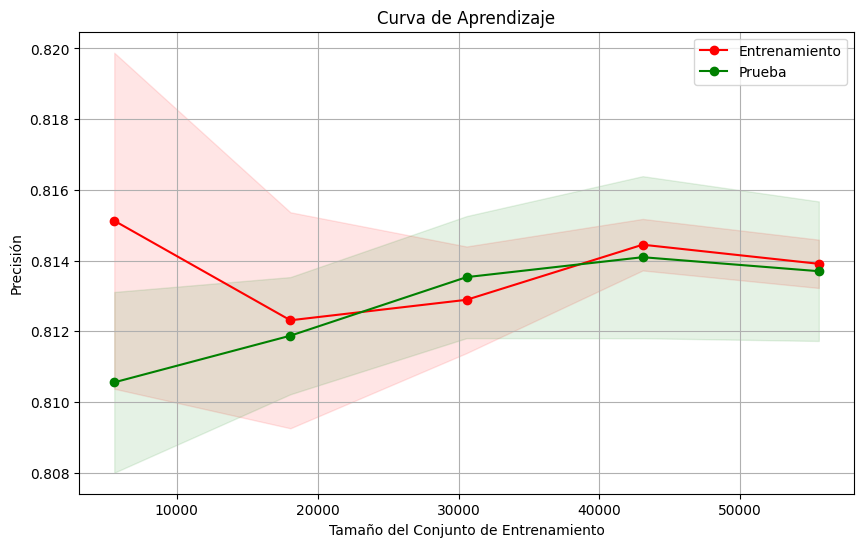

In [30]:
plot_learning_curve(modelEntrenadoLR, X_train, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 5))

# Modelo no supervisado + modelo supervisado

### Predictivo o supervisado usaremos RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
param_grid_RFC = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

modelRFC = RandomForestClassifier()

grid_search_RFC = GridSearchCV(modelRFC, param_grid_RFC, cv=3, scoring='accuracy')
grid_search_RFC.fit(X_train, y_train)


best_params_RFC = grid_search_RFC.best_params_
print("Mejores hiperparámetros:", best_params_RFC)

Mejores hiperparámetros: {'max_depth': 7, 'n_estimators': 50}


## Entrenamiento del modelo basado en hiperparametros

In [32]:
modelRFC = RandomForestClassifier(n_estimators=200, max_depth=7)

modelEntrenadoRFC = modelRFC.fit(X_train, y_train)

## Predicciones y tabla de métricas de evaluación para el modelo de RandomForestClassifier

In [33]:
predictions = modelEntrenadoRFC.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     10421
           1       0.83      0.92      0.87     10421

    accuracy                           0.87     20842
   macro avg       0.87      0.87      0.87     20842
weighted avg       0.87      0.87      0.87     20842



## Gráfico ROC para modelo RandomForestClassifier

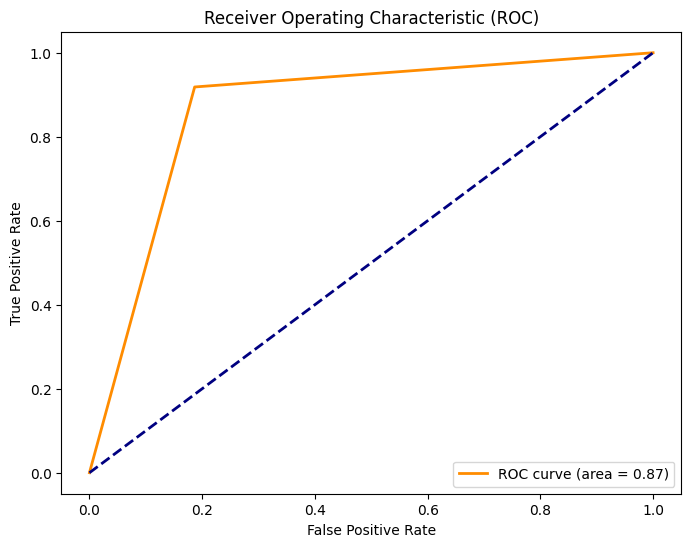

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Grafica de learning curve

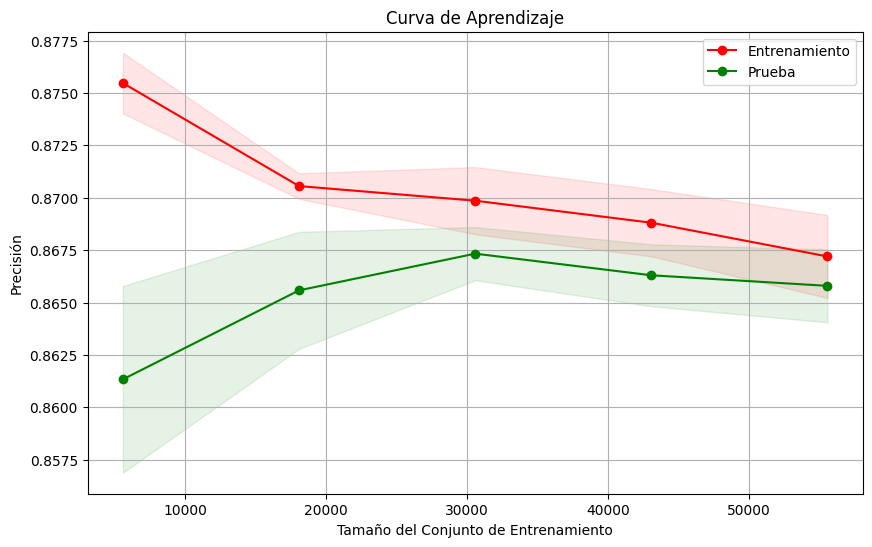

In [35]:
plot_learning_curve(modelEntrenadoRFC, X_train, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 5))

## Modelo no supervisado, usaremos KMeans


In [36]:
from sklearn.cluster import KMeans

modelKMean=KMeans()

param_grid_kmeans = {
    'n_clusters': [2, 3, 4],
    'init': ['k-means++', 'random']
}

grid_search_kmean = GridSearchCV(modelKMean, param_grid_kmeans, cv=3, scoring='accuracy')
grid_search_kmean.fit(X_train, y_train)

best_params_kmean = grid_search_kmean.best_params_

print(best_params_kmean)

c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

{'init': 'random', 'n_clusters': 2}


## Entrenamiento del modelo basado en hiperparametros

In [37]:
modelKMean = KMeans(init='random', n_clusters=2)

modelEntrenadoKMeans = modelKMean.fit(X_train, y_train)


c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Predicciones y tabla de métricas de evaluación para el modelo de KMeans

In [38]:
predictions = modelEntrenadoKMeans.predict(X_test)
print(classification_report(y_test, predictions))

train_accuracy= accuracy_score(y_test,predictions)

print('Accuracy')
print( 100*train_accuracy)

              precision    recall  f1-score   support

           0       0.52      0.39      0.45     10421
           1       0.51      0.64      0.57     10421

    accuracy                           0.52     20842
   macro avg       0.52      0.52      0.51     20842
weighted avg       0.52      0.52      0.51     20842

Accuracy
51.559351309855096


# Combinación de los dos modelos (KMeans+RandomForestClassifier)

In [39]:
# Usamos los mejores hiperparámetros para nuestro modelo KMeans
modelKMean = KMeans(init='random', n_clusters=2)
modelEntrenadoKMeans = modelKMean.fit(X_train)

# Obtener las asignaciones de cluster
cluster_assignments_train = modelEntrenadoKMeans.predict(X_train)
cluster_assignments_test = modelEntrenadoKMeans.predict(X_test)

# Agregar las asignaciones de cluster como nuevas características
X_train_combined = np.column_stack((X_train, cluster_assignments_train))
X_test_combined = np.column_stack((X_test, cluster_assignments_test))

# Modelo supervisado (RandomForestClassifier)
param_grid_RFC = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

modelRFC = RandomForestClassifier()

grid_search_RFC = GridSearchCV(modelRFC, param_grid_RFC, cv=3, scoring='accuracy')
grid_search_RFC.fit(X_train_combined, y_train)

best_params_RFC = grid_search_RFC.best_params_

# Entrenar el modelo RandomForestClassifier con los mejores hiperparámetros
modelRFC = RandomForestClassifier(**best_params_RFC)
modelEntrenadoRFC = modelRFC.fit(X_train_combined, y_train)

# Predicciones y evaluación para el modelo RandomForestClassifier
predictions_RFC = modelEntrenadoRFC.predict(X_test_combined)
accuracy_RFC = accuracy_score(y_test, predictions_RFC)
classification_report_RFC = classification_report(y_test, predictions_RFC)

print("Mejores hiperparámetros para RandomForestClassifier :", best_params_RFC)
print("Accuracy del modelo RandomForestClassifier + KMeans:", accuracy_RFC*100)
print("Classification Report del modelo RandomForestClassifier + KMeans:\n", classification_report_RFC)

c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Mejores hiperparámetros para RandomForestClassifier : {'max_depth': 7, 'n_estimators': 200}
Accuracy del modelo RandomForestClassifier + KMeans: 86.72872085212552
Classification Report del modelo RandomForestClassifier + KMeans:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86     10421
           1       0.83      0.92      0.87     10421

    accuracy                           0.87     20842
   macro avg       0.87      0.87      0.87     20842
weighted avg       0.87      0.87      0.87     20842



## Gráfico ROC

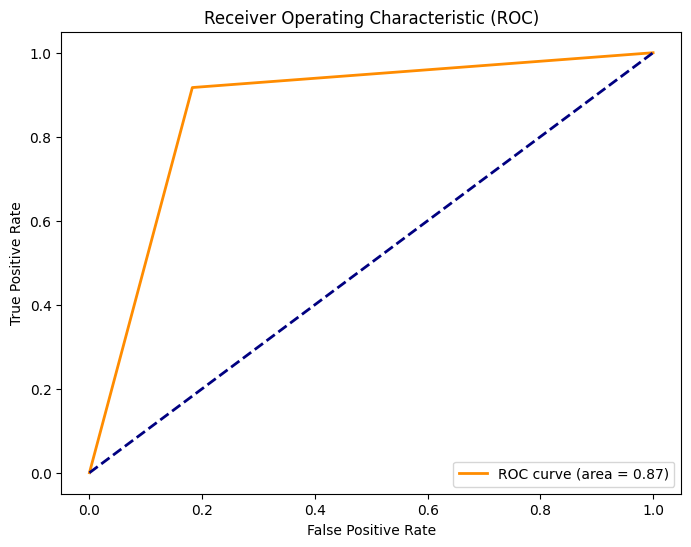

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_RFC)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Grafica de learning curve


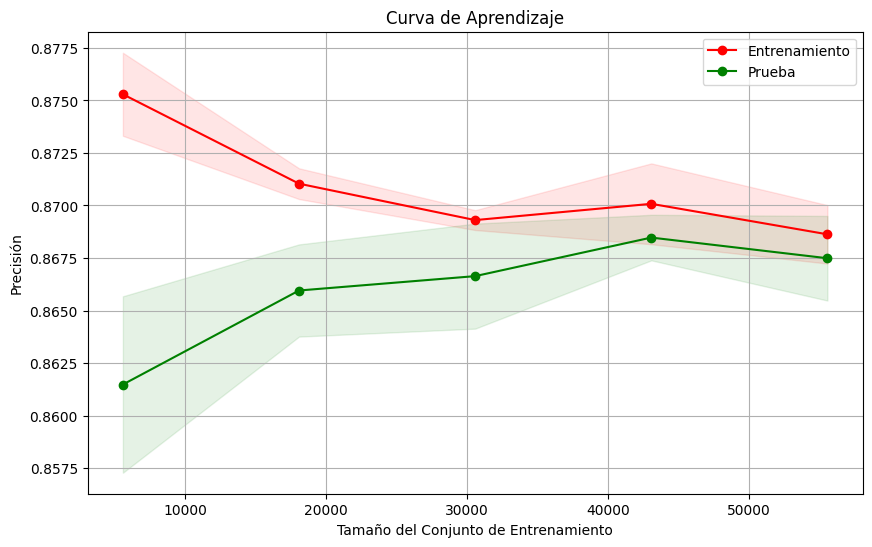

In [41]:
plot_learning_curve(modelEntrenadoRFC, X_train_combined, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 5))

# Combinación 2 de dos modelos (PCA+RandomForestClassifier)

In [42]:
from sklearn.decomposition import PCA

param_grid_PCA = {
    'n_components': [3, 5, 7],
    'whiten': [True, False]
}

modelPCA = PCA()
grid_search_PCA = GridSearchCV(modelPCA, param_grid_PCA, cv=3, scoring='accuracy')
grid_search_PCA.fit(X_train)

# Obtener los mejores hiperparámetros para el modelo PCA
best_params_PCA = grid_search_PCA.best_params_

# Ajustar el modelo PCA con los mejores hiperparámetros
modelPCA = PCA(**best_params_PCA)
X_train_pca = modelPCA.fit_transform(X_train)
X_test_pca = modelPCA.transform(X_test)


# Modelo supervisado (RandomForestClassifier)
param_grid_RFC = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

modelRFC = RandomForestClassifier()

grid_search_RFC = GridSearchCV(modelRFC, param_grid_RFC, cv=3, scoring='accuracy')
grid_search_RFC.fit(X_train_pca, y_train)

best_params_RFC = grid_search_RFC.best_params_

# Entrenar el modelo RandomForestClassifier con los mejores hiperparámetros
modelRFC = RandomForestClassifier(**best_params_RFC)
modelEntrenadoRFC = modelRFC.fit(X_train_pca, y_train)

# Predicciones y evaluación para el modelo RandomForestClassifier
predictions_RFC = modelEntrenadoRFC.predict(X_test_pca)
accuracy_RFC = accuracy_score(y_test, predictions_RFC)
classification_report_RFC = classification_report(y_test, predictions_RFC)

print("Mejores hiperparámetros para PCA:", best_params_PCA)
print("Mejores hiperparámetros para RandomForestClassifier:", best_params_RFC)
print("Accuracy del modelo RandomForestClassifier + PCA:", accuracy_RFC*100)
print("Classification Report del modelo RandomForestClassifier + PCA:\n", classification_report_RFC)

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

 

Mejores hiperparámetros para PCA: {'n_components': 3, 'whiten': True}
Mejores hiperparámetros para RandomForestClassifier: {'max_depth': 7, 'n_estimators': 100}
Accuracy del modelo RandomForestClassifier + PCA: 79.45014873812494
Classification Report del modelo RandomForestClassifier + PCA:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79     10421
           1       0.78      0.83      0.80     10421

    accuracy                           0.79     20842
   macro avg       0.80      0.79      0.79     20842
weighted avg       0.80      0.79      0.79     20842



# Gráfico ROC

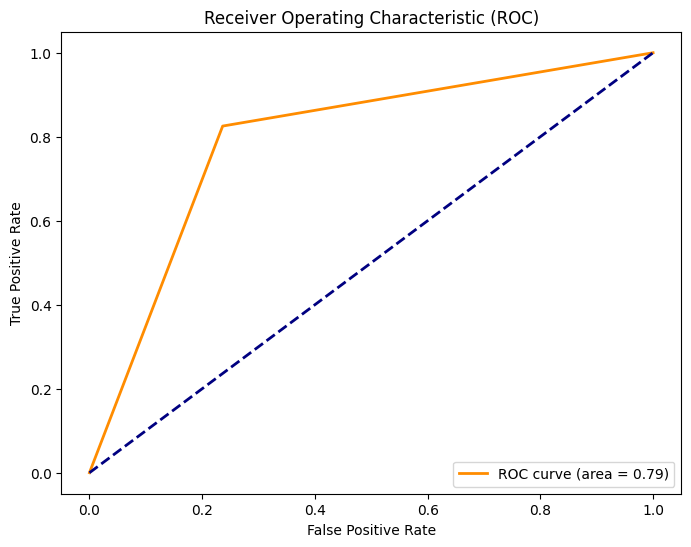

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_RFC)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Grafica de learning curve

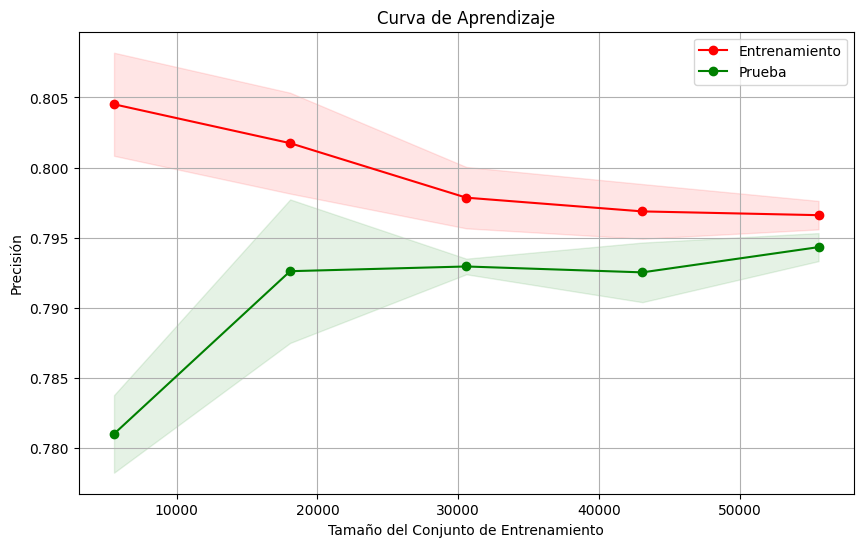

In [44]:
plot_learning_curve(modelEntrenadoRFC, X_train_pca, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 5))